#Online Learning Analytics & Student Success Prediction

IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

READ DATA

In [ ]:
df = pd.read_csv("/content/online_learning_analytics_dataset  (1).csv")

In [ ]:
df.shape

(20, 7)

In [ ]:
df.columns

Index(['Student_ID', 'Login_Frequency', 'Video_Watch_Time_Hours',
       'Assignments_Submitted', 'Attendance_Percentage', 'Quiz_Marks',
       'Final_Result'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Student_ID              20 non-null     int64 
 1   Login_Frequency         20 non-null     int64 
 2   Video_Watch_Time_Hours  20 non-null     int64 
 3   Assignments_Submitted   20 non-null     int64 
 4   Attendance_Percentage   20 non-null     int64 
 5   Quiz_Marks              20 non-null     int64 
 6   Final_Result            20 non-null     object
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [ ]:
df.head()

,Student_ID,Login_Frequency,Video_Watch_Time_Hours,Assignments_Submitted,Attendance_Percentage,Quiz_Marks,Final_Result
0,1,22,35,7,85,80,Pass
1,2,15,20,5,70,65,Pass
2,3,30,50,9,95,92,Pass
3,4,5,7,2,40,45,Fail
4,5,18,25,6,75,70,Pass


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Login_Frequency,0
Video_Watch_Time_Hours,0
Assignments_Submitted,0
Attendance_Percentage,0
Quiz_Marks,0
Final_Result,0


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Login_Frequency,0
Video_Watch_Time_Hours,0
Assignments_Submitted,0
Attendance_Percentage,0
Quiz_Marks,0
Final_Result,0


In [ ]:
df.describe()

,Student_ID,Login_Frequency,Video_Watch_Time_Hours,Assignments_Submitted,Attendance_Percentage,Quiz_Marks
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,18.300000,28.600000,6.00000,74.550000,71.950000
std,5.91608,8.310425,14.872794,2.36198,17.376557,15.776315
min,1.00000,5.000000,7.000000,2.00000,40.000000,45.000000
25%,5.75000,11.500000,17.250000,4.75000,63.750000,59.500000
50%,10.50000,18.500000,26.500000,6.00000,76.500000,71.000000
75%,15.25000,25.250000,40.500000,8.00000,88.500000,85.750000
max,20.00000,32.000000,55.000000,10.00000,98.000000,95.000000


In [ ]:
df = df.drop_duplicates()
df.shape

(20, 7)

TARGET VARIABLE ANALYSIS

In [ ]:
target_col = 'Final_Result'

Final_Result
Pass    14
Fail     6
Name: count, dtype: int64


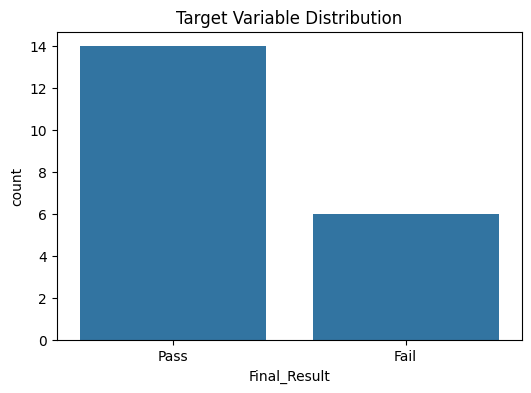

In [ ]:
print(df[target_col].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution")
plt.show()

CATEGORICAL VS NUMERICAL FEATURES

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: Index(['Final_Result'], dtype='object')
Numerical Columns: Index(['Student_ID', 'Login_Frequency', 'Video_Watch_Time_Hours',
       'Assignments_Submitted', 'Attendance_Percentage', 'Quiz_Marks'],
      dtype='object')


CATEGORICAL FEATURE ANALYSIS

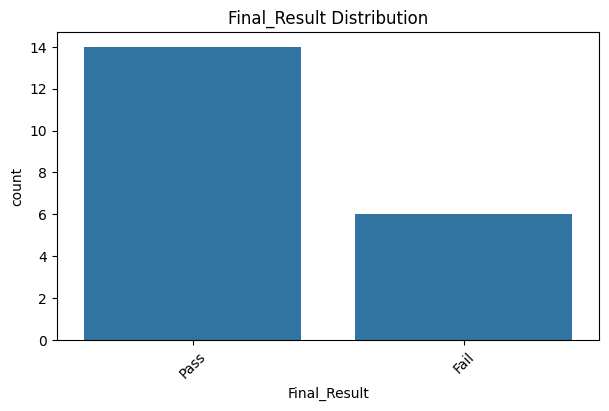

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution")
    plt.show()

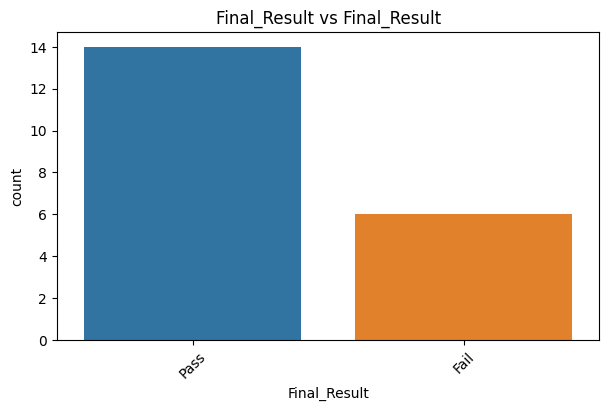

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue=target_col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target_col}")
    plt.show()

NUMERICAL FEATURE DISTRIBUTION

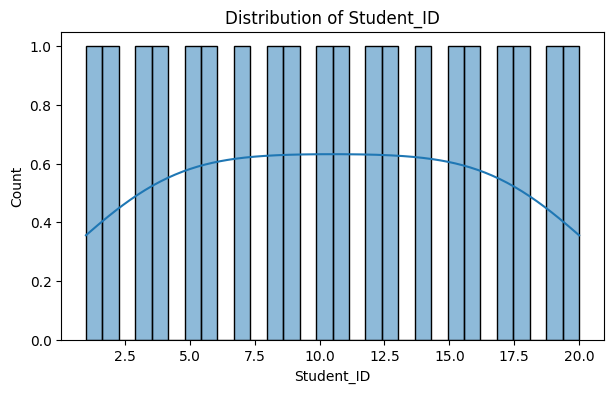

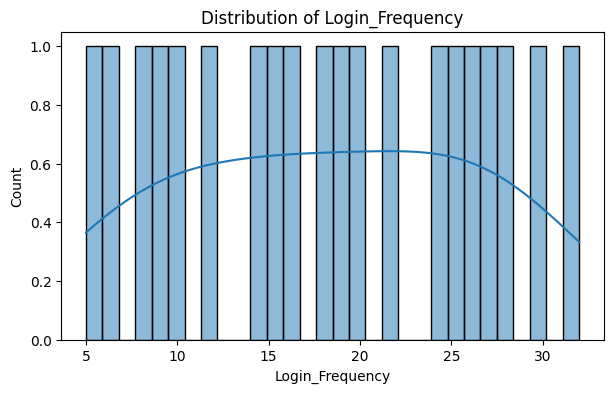

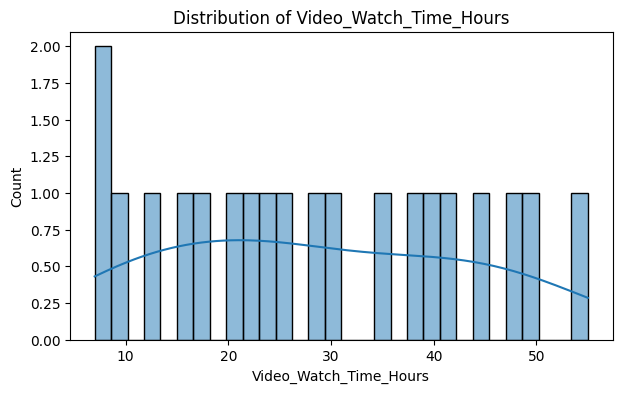

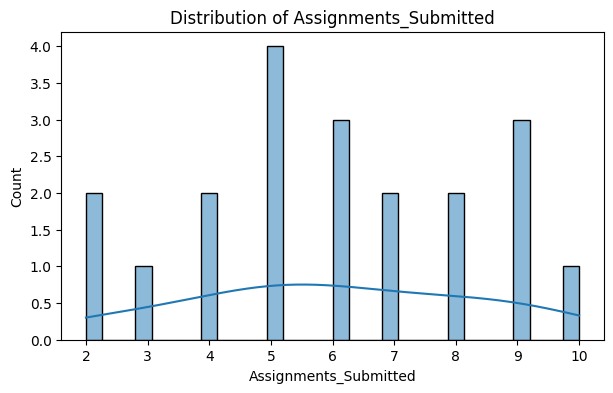

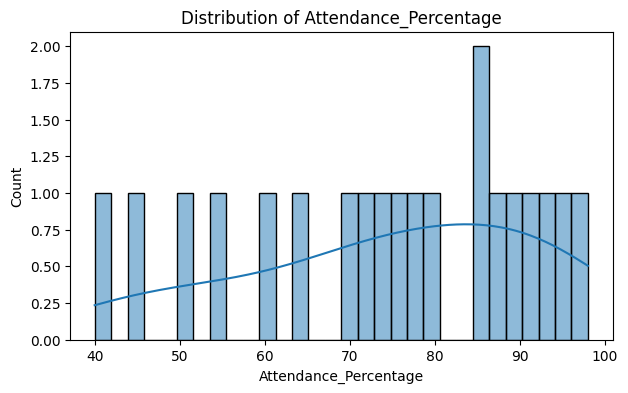

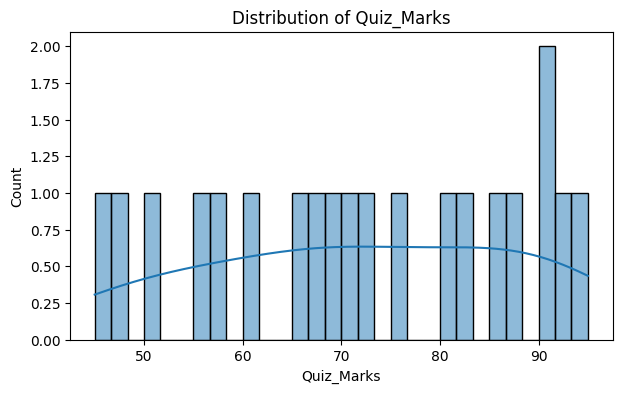

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

NUMERICAL FEATURES VS TARGET

HISTOGRAM

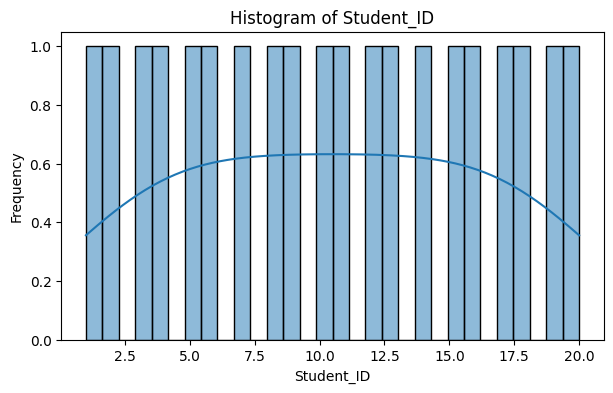

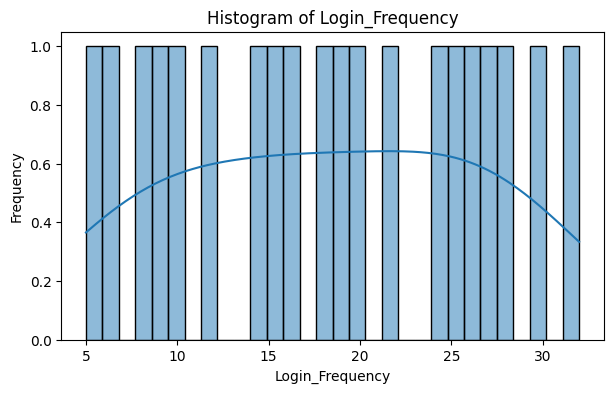

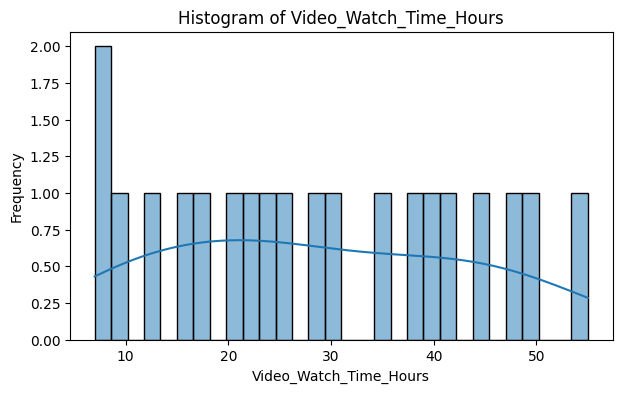

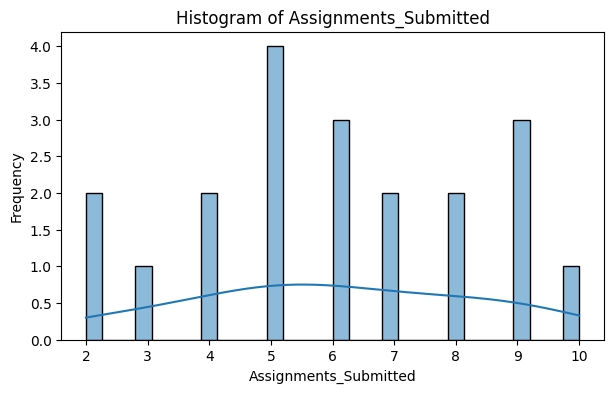

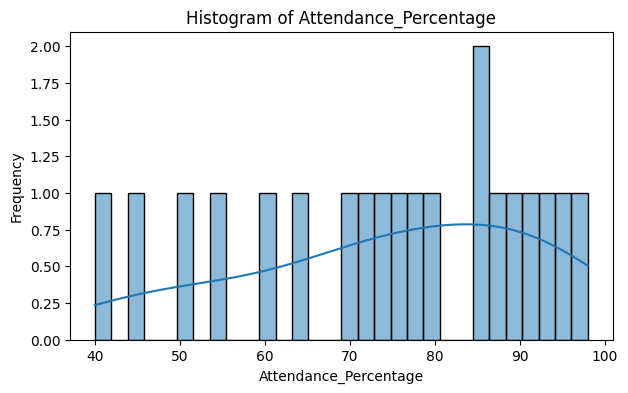

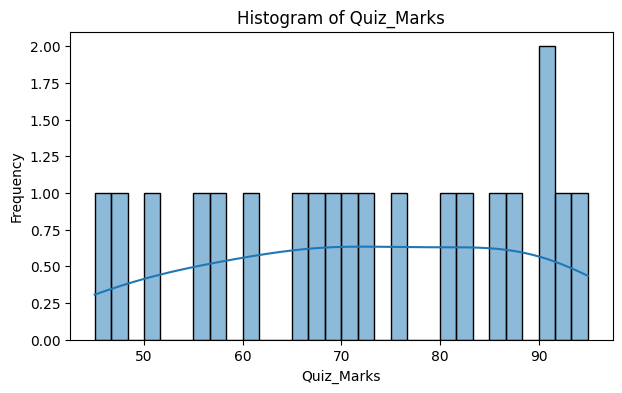

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

BOXPLOT

This helps detect:


*   Outliers
*   Differences between student groups


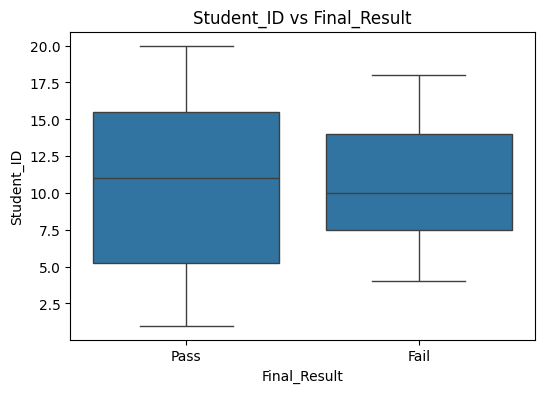

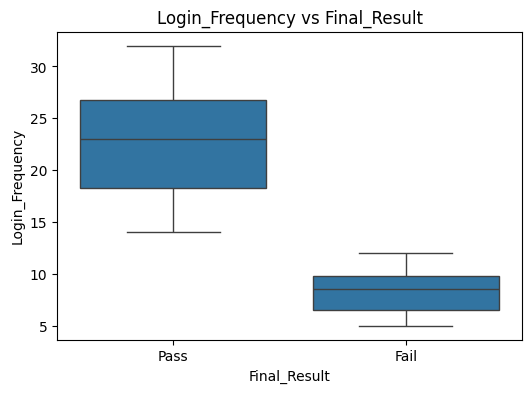

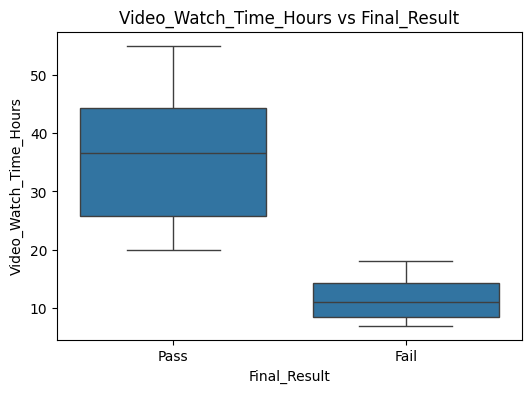

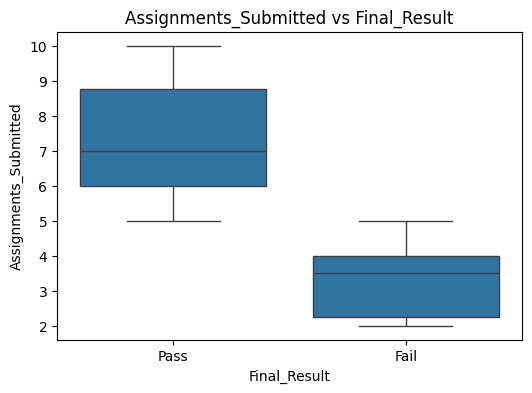

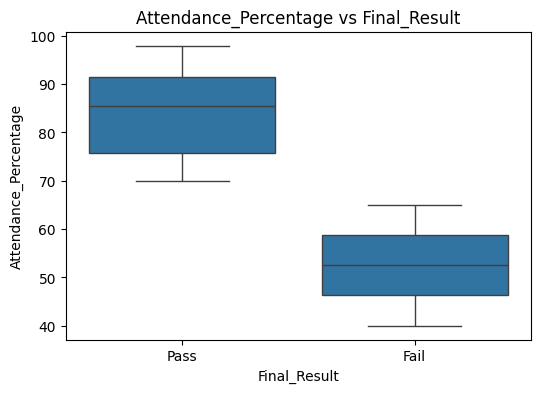

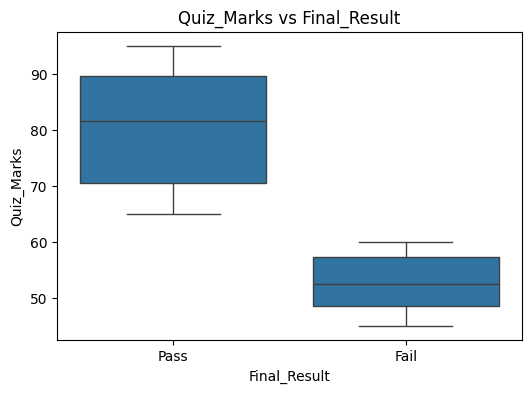

In [ ]:
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f"{col} vs {target_col}")
        plt.show()

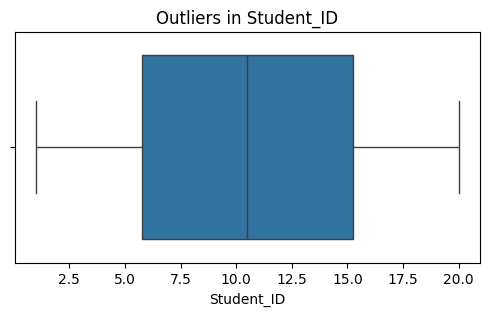

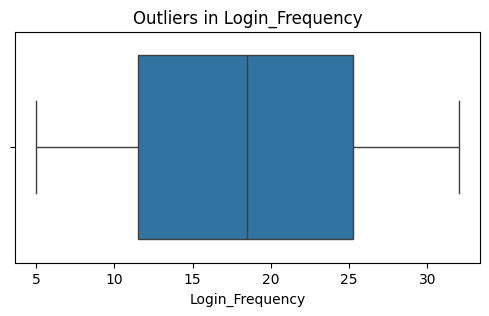

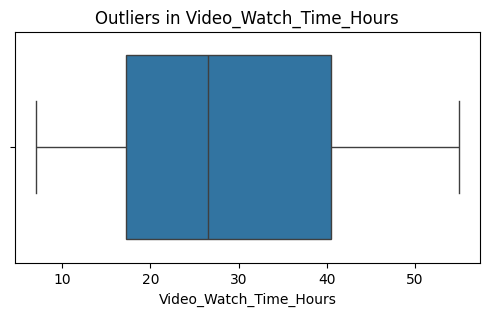

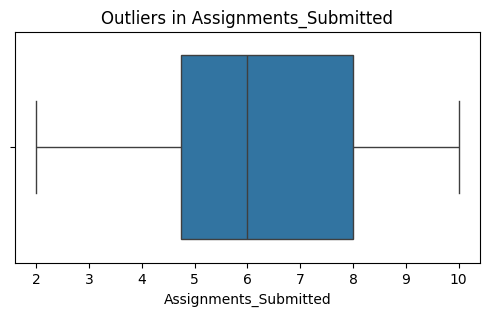

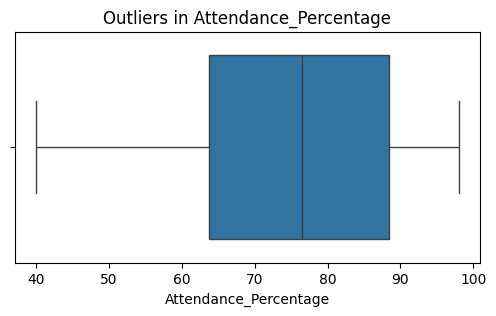

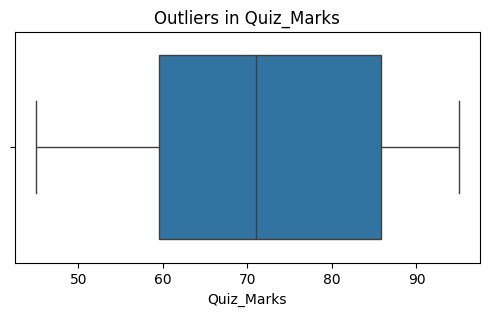

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

CORRELATION HEATMAP

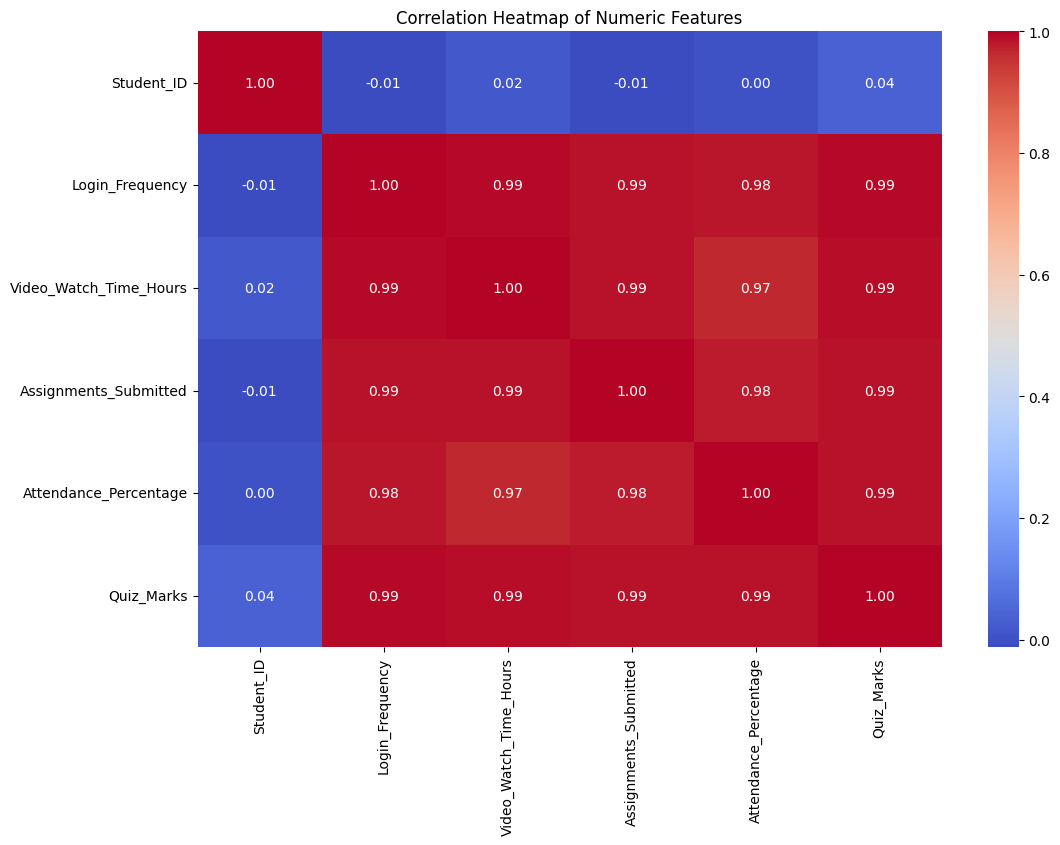

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm'
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

PREPARE DATA FOR MODEL

In [ ]:
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (16, 6)
Testing Set Shape: (4, 6)
